# Analiza i Przetwarzanie Obrazów - Sprawozdanie 2 - Aleksander Kluczka


## Laboratorium 5 - Wykrywanie krawędzi

### a) Proszę wczytać przykładowy obraz lab5_1.jpg i skonwertować go do obrazu w skali szarości.

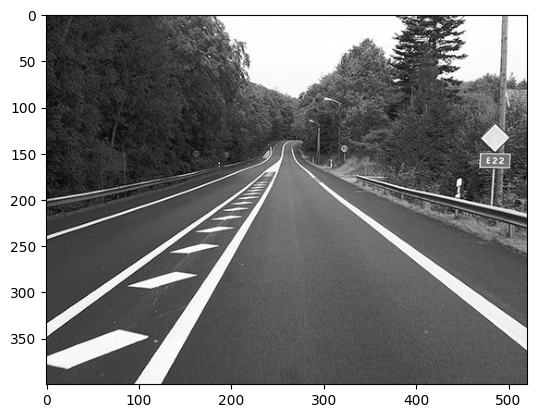

In [2]:
import cv2
from matplotlib import pyplot as plt

image_bgr = cv2.imread("res/lab5_1.jpg")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")


### b) Proszę sprawdzić i porównać wynik wykrywania krawędzi metodami Laplace (a) i Canny (b) dla obrazu oryginalnego i obrazu z nałożonym filtrem gaussowskim (5x5). Wynikowy obraz można poddać progowaniu.

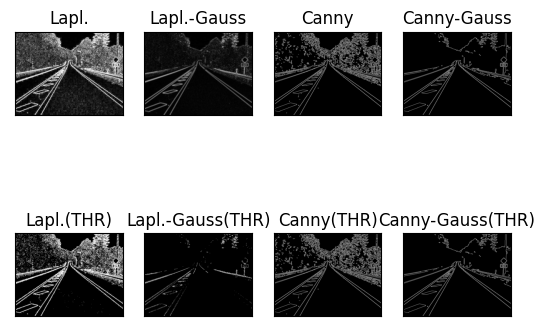

In [3]:
image_gauss = cv2.GaussianBlur(image, (5, 5), 0)

# Wykrywanie krawedzi
## Laplace
lapl_16s = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
lapl_gauss_16s = cv2.Laplacian(image_gauss, cv2.CV_16S, ksize=3)

## Canny
canny_16s = cv2.Canny(image, 100, 200)
canny_gauss_16s = cv2.Canny(image_gauss, 100, 200)

# Konwersja CV_16S na CV_8U
lapl = cv2.convertScaleAbs(lapl_16s)
lapl_gauss = cv2.convertScaleAbs(lapl_gauss_16s)
canny = cv2.convertScaleAbs(canny_16s)
canny_gauss = cv2.convertScaleAbs(canny_gauss_16s)

# Progowanie THRESH_BINARY
_, thr_lapl = cv2.threshold(cv2.convertScaleAbs(lapl), 127, 255, cv2.THRESH_BINARY)
_, thr_lapl_gauss = cv2.threshold(cv2.convertScaleAbs(lapl_gauss), 127, 255, cv2.THRESH_BINARY)
_, thr_canny = cv2.threshold(cv2.convertScaleAbs(canny), 127, 255, cv2.THRESH_BINARY)
_, thr_canny_gauss = cv2.threshold(cv2.convertScaleAbs(canny_gauss), 127, 255, cv2.THRESH_BINARY)

# wyswietlanie wynikow wykrywania krawedzi
titles = [
    "Lapl.",
    "Lapl.-Gauss",
    "Canny",
    "Canny-Gauss",
    "Lapl.(THR)",
    "Lapl.-Gauss(THR)",
    "Canny(THR)",
    "Canny-Gauss(THR)",
]
images = [
    lapl,
    lapl_gauss,
    canny,
    canny_gauss,
    thr_lapl,
    thr_lapl_gauss,
    thr_canny,
    thr_canny_gauss,
]

for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], "gray")
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


### c) Proszę zbadać wpływ parametrów minVal, maxVal i kSize na wynik działania algorytmu Canny.

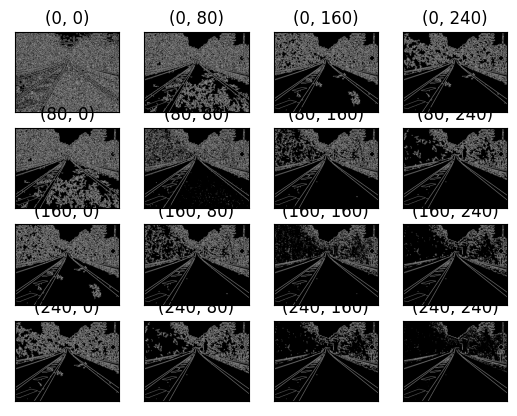

In [4]:
res = {}
for min_val in [0, 80, 160, 240]:
    for max_val in [0, 80, 160, 240]:
        canny = cv2.Canny(image, min_val, max_val)
        title = str((min_val, max_val))
        res[title] = canny

for i, (key, img) in enumerate(res.items()):
    plt.subplot(4, 4, i + 1)
    plt.imshow(img, "gray", vmin=0, vmax=255)
    plt.title(key)
    plt.xticks([])
    plt.yticks([])

plt.show()

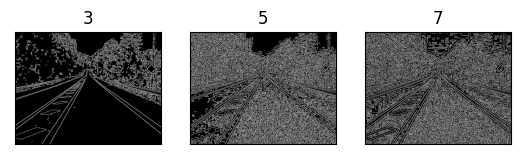

In [5]:
res = {}
for ksize in [3, 5, 7]:
    can = cv2.Canny(image, 100, 200, apertureSize=ksize)
    res[ksize] = can

for i, (key, img) in enumerate(res.items()):
    plt.subplot(1, len(res), i + 1)
    plt.imshow(img, "gray", vmin=0, vmax=255)
    plt.title(key)
    plt.xticks([])
    plt.yticks([])

plt.show()


### d) Proszę dokonać wykrywania linii metodą transformacji Hough.
### e) Proszę zbadać wpływ progu na wynik działania transformacji Hough.

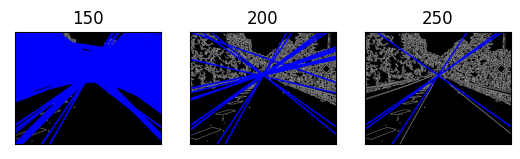

In [6]:
import numpy as np

canny = cv2.Canny(image, 50, 200, None, 3)

res = {}
for threshold in [150, 200, 250]:
    canny_bgr = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

    lines = cv2.HoughLines(canny, 1, np.pi / 180, threshold, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho, theta = lines[i][0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            point1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            point2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(canny_bgr, point1, point2, (0, 0, 255), 3, cv2.LINE_AA)
    res[threshold] = canny_bgr

for i, (key, img) in enumerate(res.items()):
    plt.subplot(1, len(res), i + 1)
    plt.imshow(img, "gray", vmin=0, vmax=255)
    plt.title(key)
    plt.xticks([])
    plt.yticks([])

plt.show()

### f) Proszę wczytać drugi z przykładowych obrazów lab5_2.png, podobnie go skonwertować i dokonać wykrywania okręgów.

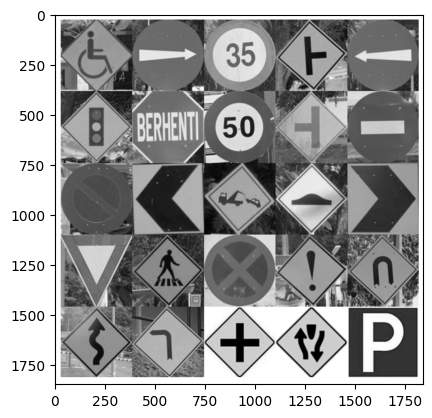

In [7]:
import cv2

image_bgr = cv2.imread("res/lab5_2.png")
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")

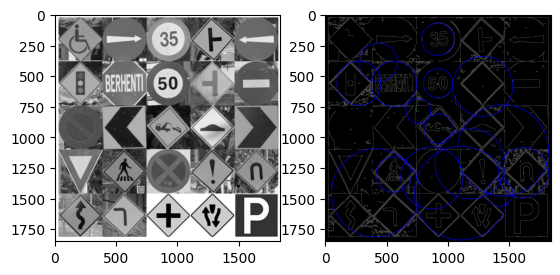

In [8]:
canny = cv2.Canny(image, 50, 200, None, 3)
canny_bgr = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(
    canny,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=200,
    param1=1000,
    param2=60,
    minRadius=100,
    maxRadius=400,
)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(canny_bgr, (i[0], i[1]), i[2], (0, 0, 255), 3)
        cv2.circle(canny_bgr, (i[0], i[1]), 2, (0, 255, 0), 3)

plt.subplot(1, 2, 1)
plt.imshow(image, "gray")
plt.subplot(1, 2, 2)
plt.imshow(canny_bgr)

## Laboratorium 6 - Analiza sekwencji wideo

Proszę wczytać przykładowy krótki film przedstawiający obraz z kamery samochodu poruszającego się po
drodze i zrealizować na nim metodę wykrywania linii poprzez transformację Hough. Wynik należy
zwizualizować na sekwencji wideo.

Wczytać drugi film, przedstawiający nagranie samochodów na autostradzie. Przenieść do odcieni
szarości. Stworzyć sekwencję różnic pomiędzy kolejnymi klatkami. Utworzone różnice wykorzystać jako
maski na oryginalnych klatkach. (Jeżeli klatki są za duże, to można je
przeskalować stosując `cv2.resize(...)`).

In [9]:
import cv2
import numpy as np


def Hough(image):
    canny = cv2.Canny(image, 50, 200, None, 3)
    canny_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    val = 250

    lines = cv2.HoughLines(canny, 1, np.pi / 180, val, None, 0, 0)
    if lines is not None:
        for i in range(0, len(lines)):
            rho, theta = lines[i][0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(canny_bgr, pt1, pt2, (0, 0, 255), 3, cv2.LINE_AA)
    return canny_bgr

In [10]:
video = cv2.VideoCapture("res/vid1.mov")

fourcc = cv2.VideoWriter_fourcc(*"XVID")
output = cv2.VideoWriter("out/hough.avi", fourcc, 25.0, (1920, 1080))

while True:
    ret, frame = video.read()
    if not ret:
        break

    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.Canny(frame, 50, 200, None, 3)
    frame = Hough(frame)
    output.write(frame)

output.release()


In [11]:
video = cv2.VideoCapture("res/vid2.mov")
frames = []
while True:
    ret, frame = video.read()
    if not ret:
        break
    frames.append(frame)

In [12]:
output = cv2.VideoWriter("out/diff.avi", fourcc, 25.0, (1280, 720))
masks = []
for i in range(0, len(frames) - 1):
    frame1 = cv2.resize(frames[i], (1280, 720))
    frame2 = cv2.resize(frames[i + 1], (1280, 720))
    difference = cv2.subtract(frame1, frame2)
    Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    difference[mask != 255] = [0, 0, 255]

    output.write(difference)

output.release()

## Laboratorium 7 - Zadania rozpoznawania

### a) Proszę porównać metody Harrisa, SIFT, SURF, FAST i ORB w zadaniu rozpoznawania punktów charakterystycznych dla obrazu lab5_2.png.

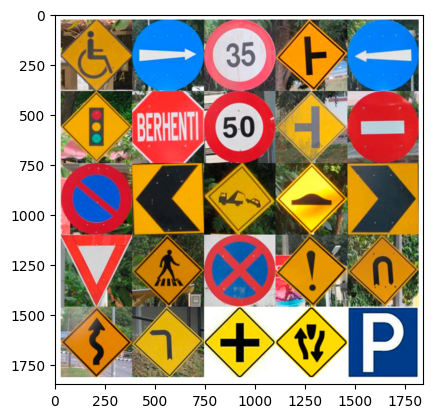

In [13]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

image = cv2.imread("res/lab5_2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


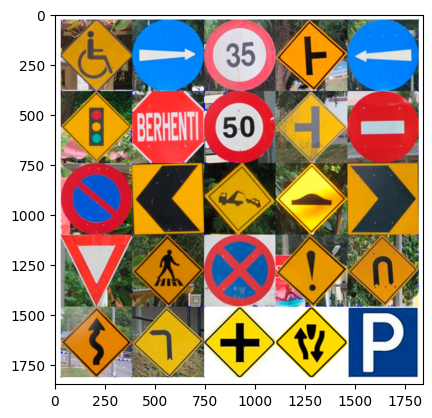

In [14]:
# Harris
image_harris = image
image_gray = cv2.cvtColor(image_harris, cv2.COLOR_RGB2GRAY)
image_gray = np.float32(image_gray)
dest = cv2.cornerHarris(image_gray, 2, 3, 0.04)
dest = cv2.dilate(dest, None)
image_harris[dest > 0.01 * dest.max()] = [0, 0, 255]
plt.imshow(image_harris)


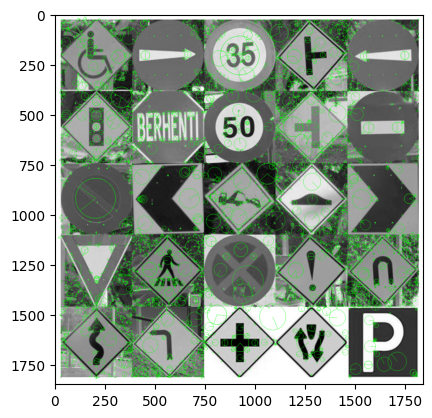

In [15]:
# SIFT
image_sift = image
image_gray = cv2.cvtColor(image_sift, cv2.COLOR_RGB2GRAY)
sift = cv2.xfeatures2d.SIFT_create()
keypoint = sift.detect(image_gray, None)
image_sift = cv2.drawKeypoints(
    image_gray,
    keypoint,
    image_sift,
    color=(0, 255, 0),
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)
plt.imshow(image_sift)


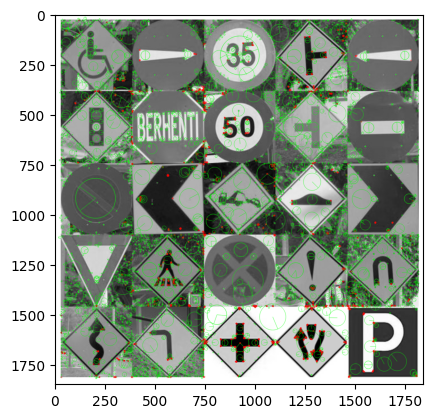

In [16]:
# ORB (zamiast SURF)
image_copy = image
image_gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
orb = cv2.ORB_create(nfeatures=2000)
keypoints, des = orb.detectAndCompute(image_gray, None)
image_orb = cv2.drawKeypoints(image_copy, keypoints, None, color=(255, 0, 0), flags=0)
plt.imshow(image_orb)


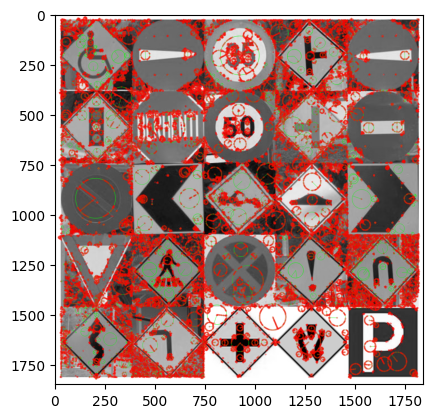

In [17]:
# FAST
image_copy = image
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(image_copy, None)
image_fast = cv2.drawKeypoints(image_copy, keypoints, None, color=(255, 0, 0))
plt.imshow(image_fast)

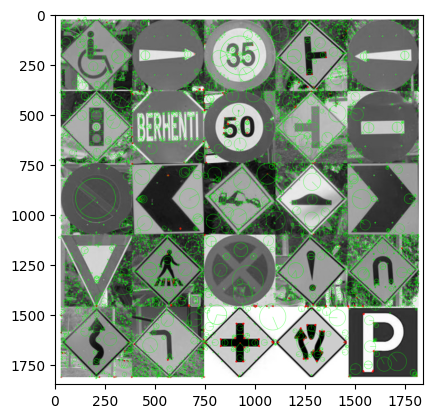

In [18]:
# ORB
image_copy = image
orb = cv2.ORB_create()
keypoints = orb.detect(image_copy, None)
keypoints, descriptors = orb.compute(image_copy, keypoints)
image_orb = cv2.drawKeypoints(image_copy, keypoints, None, color=(255, 0, 0), flags=0)
plt.imshow(image_orb)
plt.show()


**Dla której metody wyniki wydają się bliższe intuicji?**

Najbliższa intuicji wydaje się metoda Harrisa. Wynika to z faktu, że algorytm naniósł najmniej punktów na obraz, a wielu przypadkach poprawnie. Z tego powodu skuteczność tej metody jest największa.

**Która wydaje się być bardziej „aplikowalna” (np. ze względu na czas obliczeń)?**

Ze względu na czas obliczeń najlepszym wyborem może być metoda `FAST` albo `ORB`, których wykonanie w trakcie laboratorium zajęło najmniej czasu.

### b) Proszę spróbować wykryć twarz w sekwencji wideo – nagranej na kamerze lub ściągniętej z serwisu YouTube.

In [19]:
face_cascade = cv2.CascadeClassifier("res/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("res/haarcascade_eye.xml")

In [20]:
video_source = cv2.VideoCapture("res/lab7_3.mp4")
frames = []
while True:
    ret, frame = video_source.read()
    if not ret:
        break
    frames.append(frame)

In [21]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)

    faces = face_cascade.detectMultiScale(frame_gray)
    for x, y, w, h in faces:
        center = (x + w // 2, y + h // 2)
        frame = cv2.ellipse(frame, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y : y + h, x : x + w]

        eyes = eye_cascade.detectMultiScale(faceROI)
        for x2, y2, w2, h2 in eyes:
            eye_center = (x + x2 + w2 // 2, y + y2 + h2 // 2)
            radius = int(round((w2 + h2) * 0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0), 4)
    return frame

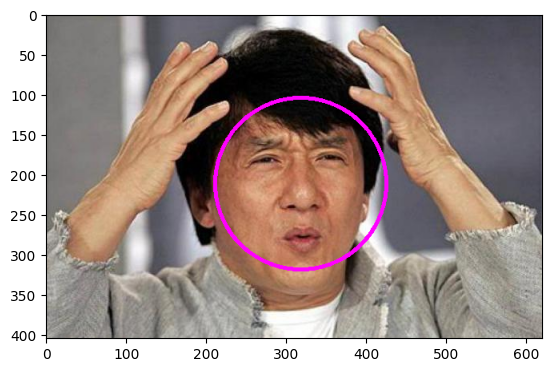

In [22]:
face = cv2.imread("res/lab7_2.jpg")
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(detectAndDisplay(face))

In [23]:
fourcc = cv2.VideoWriter_fourcc(*"XVID")
output = cv2.VideoWriter("out/diff_face.avi", fourcc, 25.0, (1280, 720))
for frame in frames:
    frame = detectAndDisplay(frame)
    output.write(frame)

output.release()